In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [8]:
x, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=23)

In [9]:
x.shape

(1000, 2)

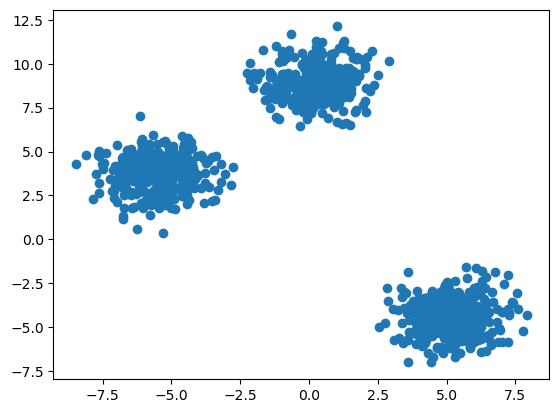

In [13]:
plt.scatter(x[:,0], x[:,1])

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33, random_state=42)

In [19]:
# Manual
from sklearn.cluster import KMeans

wcss = []  # Within-Cluster-Sum-of-Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(xtrain)  # Use kmeans.fit() instead of KMeans.fit()
    wcss.append(kmeans.inertia_)


In [20]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1173.9073331598565,
 1046.4707657692788,
 950.1047827920297,
 770.1183645470576,
 665.4293327044727,
 639.9330078792766,
 547.0218118191808]

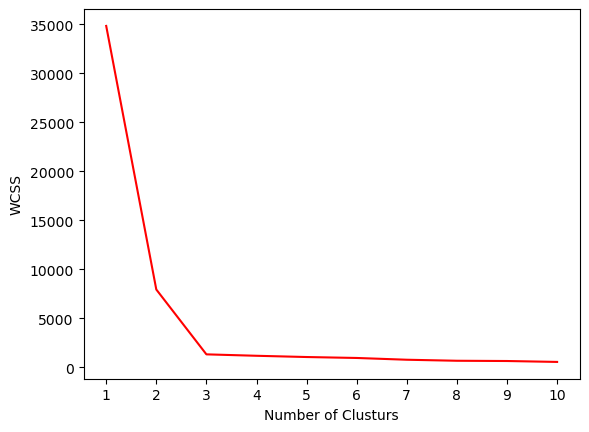

In [24]:
plt.plot(range(1,11),wcss, 'r')
plt.xlabel('Number of Clusturs')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

In [25]:
y_labels = kmeans.fit_predict(xtrain)

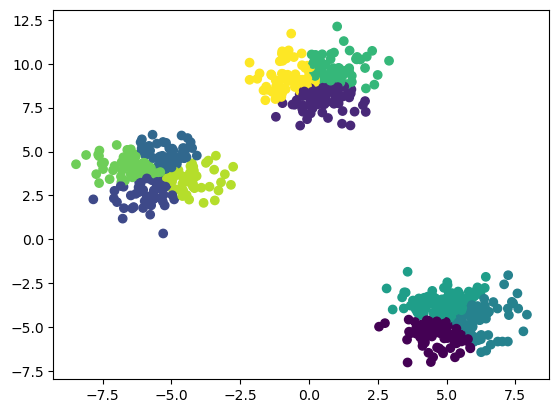

In [27]:
plt.scatter(xtrain[:,0], xtrain[:,1], c=y_labels)

In [29]:
y_test_label = kmeans.predict(xtest)

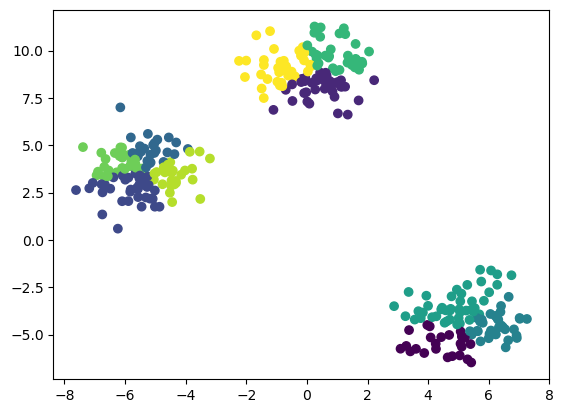

In [30]:
plt.scatter(xtest[:,0], xtest[:,1], c=y_test_label)

In [31]:
## knee locator
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [32]:
from kneed import KneeLocator

In [33]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [34]:
## Performance Matrix
## Silhoutee score

silhoutte_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(xtrain)
    score = silhoutte_coefficient(xtrain,kmeans.labels_)
    silhoutte_coefficient.append(score)

TypeError: 'list' object is not callable

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficient = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(xtrain)
    score = silhouette_score(xtrain, kmeans.labels_)
    silhouette_coefficient.append(score)


In [36]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.5017735550186946,
 0.33367872107343594,
 0.32624268272712514,
 0.3410374218001111,
 0.3361191820120951,
 0.34289822254398106]

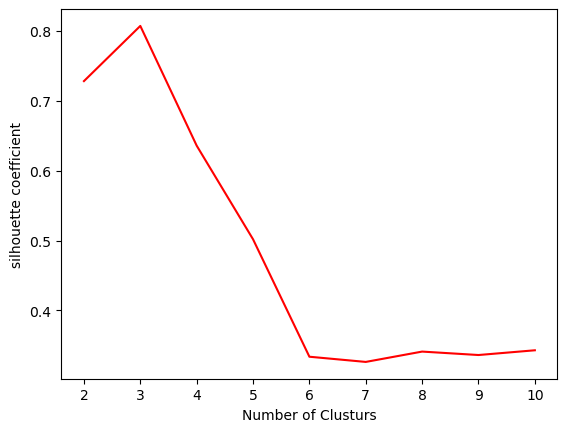

In [37]:
plt.plot(range(2,11),silhouette_coefficient, 'r')
plt.xlabel('Number of Clusturs')
plt.ylabel('silhouette coefficient')
plt.xticks(range(2,11))
plt.show()